In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import wordcloud, ImageColorGenerator

In [85]:
main=pd.read_csv('Indian_food.csv')

In [86]:
df=main.copy()

In [87]:
df.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [89]:
df.columns.value_counts()

name              1
ingredients       1
diet              1
prep_time         1
cook_time         1
flavor_profile    1
course            1
state             1
region            1
Name: count, dtype: int64

In [90]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [91]:
df[df['region'].isnull()]['region']

110    NaN
Name: region, dtype: object

In [92]:
df['region'].iloc[110]='North'

C:\Users\harsh\AppData\Local\Temp\ipykernel_12916\3207672949.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [94]:
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)

In [95]:
df.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            13
dtype: int64

In [96]:
df.shape

(255, 9)

In [97]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


# Pie chart for Vegetarians to Non-Vegetarians

In [98]:
df['diet'].value_counts()

diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64

In [99]:
pie_data= df['diet'].value_counts().reset_index()

In [100]:
pie_data

,diet,count
0,vegetarian,226
1,non vegetarian,29


In [125]:
diet=pie_data[['diet','count']]
fig=px.pie(pie_data, values='count', names='diet', title='Proportion of Vegetarian and Non Vegetarian dishes', color_discrete_sequence=['green','red'])

fig.show()

In [ ]:
df.columns.value_counts()

name              1
ingredients       1
diet              1
prep_time         1
cook_time         1
flavor_profile    1
course            1
state             1
region            1
Name: count, dtype: int64

# Calculation for Different Flavours

In [104]:
sweet_data=df[df['flavor_profile']=='sweet']
sweet_data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,NaN,NaN,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central


In [103]:
final_sweet_data=sweet_data[sweet_data['course']!='dessert']
final_sweet_data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180.0,60.0,sweet,main course,Karnataka,South
85,Dal makhani,"Red kidney beans, urad dal, cream, garam masal...",vegetarian,10.0,60.0,sweet,main course,Punjab,North
243,Mishti Chholar Dal,"Chana dal, fresh coconut, ginger, cinnamon, ra...",vegetarian,10.0,30.0,sweet,main course,West Bengal,East


In [ ]:
df[df['flavor_profile']=='bitter']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
71,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10.0,40.0,bitter,main course,Punjab,North
93,Karela bharta,"Bitter gourd, fennel, garam masala powder, chi...",vegetarian,20.0,50.0,bitter,main course,Punjab,North
196,Methi na Gota,"Rava, gram flour, lemon juice, turmeric, fenug...",vegetarian,15.0,30.0,bitter,main course,Gujarat,West
198,Muthiya,"Bottle gourd, whole wheat flour, rava, sesame ...",vegetarian,15.0,30.0,bitter,snack,Gujarat,West


In [127]:
flav_fav=df['flavor_profile'].value_counts().reset_index()
flav_fav.columns=['flavor_profile','prep_time']

fig=px.bar(flav_fav,x='flavor_profile',y='prep_time',title='variety of item according to the flavour',color_discrete_sequence=['green'])

fig.show()

<Axes: xlabel='flavor_profile', ylabel='prep_time'>

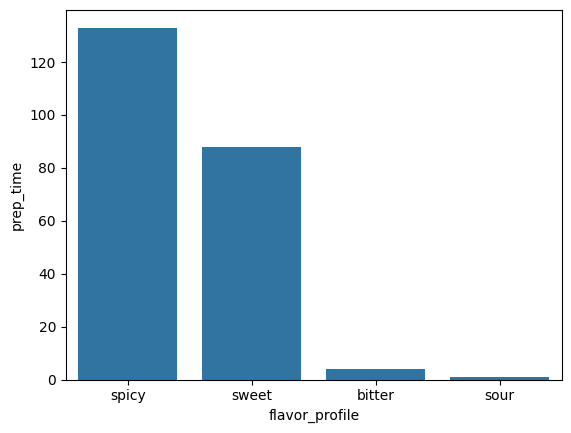

In [ ]:
#sns.barplot(x='flavor_profile',data=flav_fav,y='prep_time')

# Bar chart for Desserts cook time

In [110]:
dessert_data=sweet_data[sweet_data['course']=='dessert']
dessert_data.shape

(85, 9)

In [112]:
cook=dessert_data.sort_values(['cook_time'],ascending=True)
cook=dessert_data.head(10)
cook

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10.0,50.0,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10.0,20.0,sweet,dessert,NaN,NaN
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20.0,30.0,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10.0,40.0,sweet,dessert,NaN,NaN


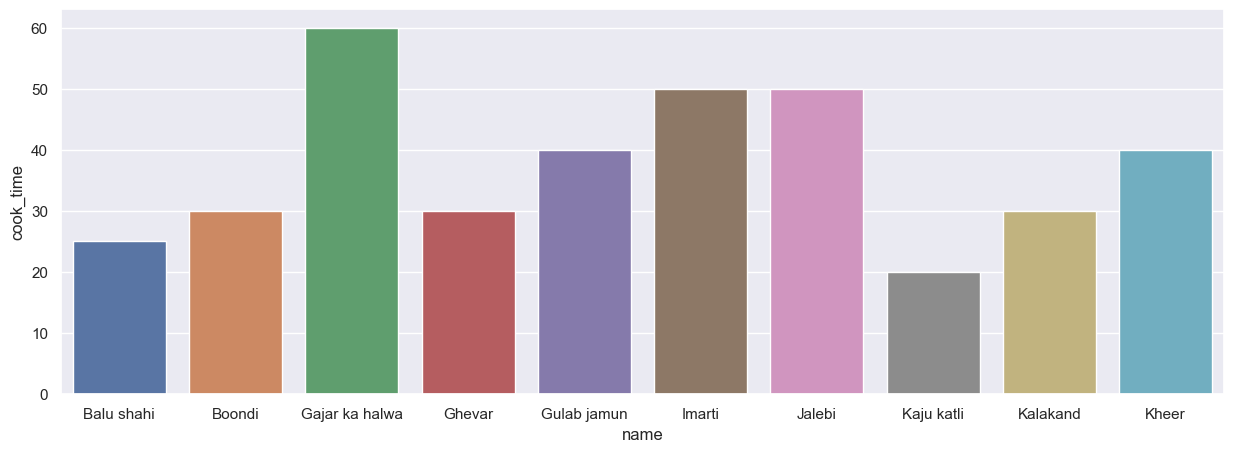

In [113]:
sns.barplot(data=cook,x='name',y='cook_time',hue='name')

sns.set_theme(rc={'figure.figsize' : (15,5)})

# Cooking time Sorting top 10

In [116]:
cooking_time= df[['cook_time','name']]
cooking_time

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun
...,...,...
250,30.0,Til Pitha
251,60.0,Bebinca
252,NaN,Shufta
253,45.0,Mawa Bati


In [117]:
cooking_time_longest=cooking_time.sort_values(['cook_time'],ascending=False)

In [120]:
ten_cooking_time_longest=cooking_time_longest.head(10)
ten_cooking_time_longest

,cook_time,name
62,720.0,Shrikhand
114,120.0,Pindi chana
75,120.0,Biryani
27,120.0,Malapua
115,90.0,Rajma chaval
83,90.0,Daal baati churma
130,90.0,Idli
34,90.0,Rasgulla
128,90.0,Dosa
142,90.0,Kuzhakkattai


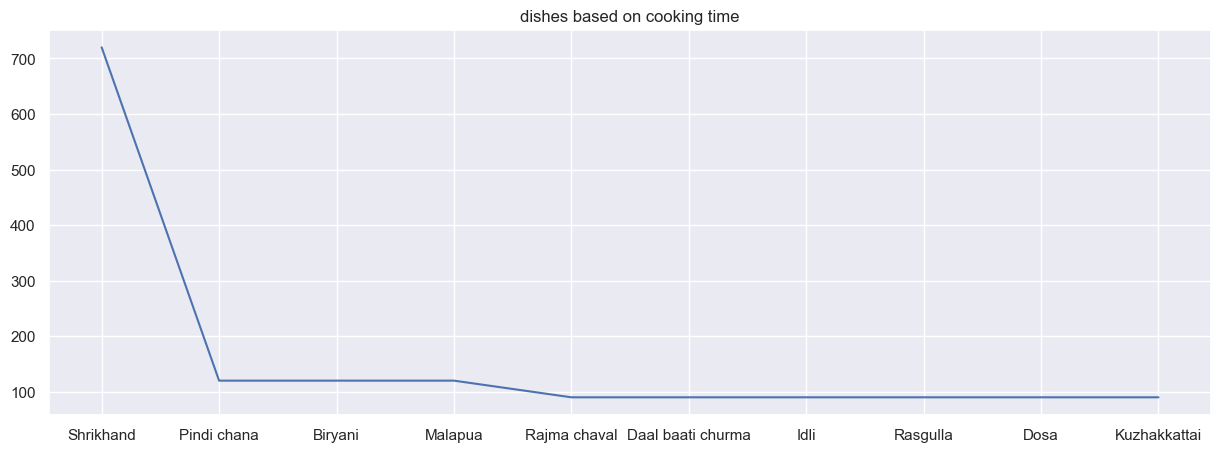

In [122]:
y=ten_cooking_time_longest['cook_time']
x=ten_cooking_time_longest['name']
plt.plot(x,y)
plt.title('dishes based on cooking time')
plt.show()